### Ülkelere ilişkin kişi başı gayri safi yurt içi hasıla verilerini alın:
Birleşmiş Milletler İnsani Gelişmişlik Raporları (Human Deveoplemen Reports) sitesinde, farklı boyutlar altında çeşitli göstergeleri içeren, ülkelerin 1990-2015 yılları arasındaki İnsani Gelişmişlik Verileri (http://hdr.undp.org/en/data) bulunmaktadır. Bu verilerden "Income/composition of resources" boyutu altında yer alan, "Gross domestic product (GDP) per capita" (kişi başı gayri safi yurt içi hasıla) göstergesine ilişkin verileri indirin ("Gross domestic product (GDP) per capita (2011 PPP $).csv"). Bu dosyadan verileri yükleyin ve bir DataFrame oluşturun.

### Veri Temizleme&Düzenleme:
```
1- Kodlamayı, ISO-8859-1 olarak ayarlayın (read_csv fonksiyonu içindeki encoding parametresi ile)
2- Dosyanın ilk satırını atlayın
3- Son satırı silin
4- Boş sütunları (bütün değerleri 'NaN' olan sütunları) silin
5- Herhangi bir verisi boş ('NaN') olan ülkeleri silin
6- Country sütununda bulunan değerlerin sonundaki ekstra boşlukları silin
7- Country sütunundaki ülke isimlerinin bazılarını aşağıdaki şekilde yeniden adlandırın:
    'Korea (Republic of)':'South Korea',
    'Venezuela (Bolivarian Republic of)':'Venezuela',
    'The former Yugoslav Republic of Macedonia':'Macedonia',
    'Hong Kong, China (SAR)':'Hong Kong'
```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#1-2
path = 'Gross domestic product (GDP) per capita (2011 PPP $).csv'
DF_GDPPC = pd.read_csv(path, encoding = "ISO-8859-1", skiprows=1)

#3
DF_GDPPC = DF_GDPPC[:-1];

#4
DF_GDPPC.dropna(axis=1, how='all', inplace=True);

#5
DF_GDPPC.dropna(inplace=True)

#6
DF_GDPPC['Country'] = DF_GDPPC['Country'].str.strip()

#7
DF_GDPPC.loc[DF_GDPPC['Country'] == 'Korea (Republic of)', 'Country'] = 'South Korea'
DF_GDPPC.loc[DF_GDPPC['Country'] == 'Venezuela (Bolivarian Republic of)', 'Country'] = 'Venezuela'
DF_GDPPC.loc[DF_GDPPC['Country'] == 'The former Yugoslav Republic of Macedonia', 'Country'] = 'Macedonia'
DF_GDPPC.loc[DF_GDPPC['Country'] == 'Hong Kong, China (SAR)', 'Country'] = 'Hong Kong'

DF_GDPPC

,HDI Rank (2015),Country,1990,1995,2000,2005,2010,2011,2012,2013,2014,2015
1,75,Albania,4303.0,3899.0,5165.0,7046.0,9374,9640,9792.0,9913.0,10122.0,10397.0
2,83,Algeria,10239.0,9297.0,10211.0,12327.0,12898,13026,13209.0,13314.0,13554.0,13823.0
3,150,Angola,4806.0,3245.0,3831.0,4311.0,6492,6524,6636.0,6858.0,6956.0,6937.0
4,62,Antigua and Barbuda,17154.0,17167.0,19319.0,21414.0,20567,19988,20577.0,20297.0,21062.0,21615.0
5,84,Armenia,3736.0,2169.0,2919.0,5297.0,6508,6803,7268.0,7473.0,7699.0,7899.0
6,2,Australia,28572.0,30348.0,35245.0,38819.0,41363,41763,42541.0,42845.0,43268.0,43655.0
7,24,Austria,31113.0,33545.0,38623.0,40954.0,42965,44022,44154.0,44038.0,43872.0,43893.0
8,78,Azerbaijan,8513.0,3320.0,4459.0,8052.0,15950,15754,15888.0,16593.0,16715.0,16695.0
9,58,Bahamas,24281.0,22111.0,25847.0,25385.0,22894,22665,22815.0,22490.0,22411.0,22394.0
10,47,Bahrain,35398.0,43244.0,45156.0,44667.0,40238,39677,40251.0,41932.0,43408.0,44182.0


### Ülkelere ilişkin coğrafi verileri alın:
Geonames veri tabanından ülkelere ilişkin coğrafi verileri içeren dosyadan (http://download.geonames.org/export/dump/countryInfo.txt) verileri yükleyin ve başka bir DataFrame daha oluşturun.

### Veri Temizleme&Düzenleme:
```
1- Dosyanın ilk 50 satırını atlayın
2- Son satırı silin
3- '#ISO' sütununun ismini 'CountryCode' olarak değiştirin
4- 'ISO3', 'ISO-Numeric', 'fips', 'EquivalentFipsCode', 'Postal Code Format', 'Postal Code Regex' ve 'geonameid' sütunlarını silin
5- Kıta (Continent) değeri boş ('NaN') olan ülkelerin kıta değerini 'NA' (North America) olarak değiştirin
```

In [2]:
#1
url = "http://download.geonames.org/export/dump/countryInfo.txt"
DF_CI = pd.read_csv(url, skiprows=50, sep='\t')

#2
DF_CI = DF_CI[:-1];

#3
DF_CI= DF_CI.rename(columns = {'#ISO':'CountryCode'})

#4
columns = ['ISO3', 'ISO-Numeric', 'fips', 'EquivalentFipsCode', 'Postal Code Format', 'Postal Code Regex', 'geonameid']
DF_CI.drop(columns, inplace=True, axis=1)

#5
DF_CI['Continent'] = DF_CI['Continent'].fillna(value='NA')

#This data was missing even though it was included in the txt file.
DF_CI.loc[DF_CI['Country']=='Namibia','CountryCode']='NA'

DF_CI

,CountryCode,Country,Capital,Area(in sq km),Population,Continent,tld,CurrencyCode,CurrencyName,Phone,Languages,neighbours
0,AD,Andorra,Andorra la Vella,468.00,84000,EU,.ad,EUR,Euro,376,ca,"ES,FR"
1,AE,United Arab Emirates,Abu Dhabi,82880.00,4975593,AS,.ae,AED,Dirham,971,"ar-AE,fa,en,hi,ur","SA,OM"
2,AF,Afghanistan,Kabul,647500.00,29121286,AS,.af,AFN,Afghani,93,"fa-AF,ps,uz-AF,tk","TM,CN,IR,TJ,PK,UZ"
3,AG,Antigua and Barbuda,St. John's,443.00,86754,NA,.ag,XCD,Dollar,+1-268,en-AG,NaN
4,AI,Anguilla,The Valley,102.00,13254,NA,.ai,XCD,Dollar,+1-264,en-AI,NaN
5,AL,Albania,Tirana,28748.00,2986952,EU,.al,ALL,Lek,355,"sq,el","MK,GR,ME,RS,XK"
6,AM,Armenia,Yerevan,29800.00,2968000,AS,.am,AMD,Dram,374,hy,"GE,IR,AZ,TR"
7,AO,Angola,Luanda,1246700.00,13068161,AF,.ao,AOA,Kwanza,244,pt-AO,"CD,NA,ZM,CG"
8,AQ,Antarctica,NaN,14000000.00,0,AN,.aq,NaN,NaN,NaN,NaN,NaN
9,AR,Argentina,Buenos Aires,2766890.00,41343201,SA,.ar,ARS,Peso,54,"es-AR,en,it,de,fr,gn","CL,BO,UY,PY,BR"


### Verilerinizi birleştirin:
Ülke adı ('Country') sütunlarının kesişimini kullanarak bu iki veri kümesini birleştirin ve 'Country' sütununu index olarak beirleyin.

In [3]:
DF_M = pd.merge(DF_GDPPC, DF_CI, on='Country', how='inner')
DF_M.set_index('Country' ,inplace=True)

DF_M

,HDI Rank (2015),1990,1995,2000,2005,2010,2011,2012,2013,2014,...,Capital,Area(in sq km),Population,Continent,tld,CurrencyCode,CurrencyName,Phone,Languages,neighbours
Country,,,,,,,,,,,,,,,,,,,,,
Albania,75,4303.0,3899.0,5165.0,7046.0,9374,9640,9792.0,9913.0,10122.0,...,Tirana,28748.0,2986952,EU,.al,ALL,Lek,355,"sq,el","MK,GR,ME,RS,XK"
Algeria,83,10239.0,9297.0,10211.0,12327.0,12898,13026,13209.0,13314.0,13554.0,...,Algiers,2381740.0,34586184,AF,.dz,DZD,Dinar,213,ar-DZ,"NE,EH,LY,MR,TN,MA,ML"
Angola,150,4806.0,3245.0,3831.0,4311.0,6492,6524,6636.0,6858.0,6956.0,...,Luanda,1246700.0,13068161,AF,.ao,AOA,Kwanza,244,pt-AO,"CD,NA,ZM,CG"
Antigua and Barbuda,62,17154.0,17167.0,19319.0,21414.0,20567,19988,20577.0,20297.0,21062.0,...,St. John's,443.0,86754,NA,.ag,XCD,Dollar,+1-268,en-AG,NaN
Armenia,84,3736.0,2169.0,2919.0,5297.0,6508,6803,7268.0,7473.0,7699.0,...,Yerevan,29800.0,2968000,AS,.am,AMD,Dram,374,hy,"GE,IR,AZ,TR"
Australia,2,28572.0,30348.0,35245.0,38819.0,41363,41763,42541.0,42845.0,43268.0,...,Canberra,7686850.0,21515754,OC,.au,AUD,Dollar,61,en-AU,NaN
Austria,24,31113.0,33545.0,38623.0,40954.0,42965,44022,44154.0,44038.0,43872.0,...,Vienna,83858.0,8205000,EU,.at,EUR,Euro,43,"de-AT,hr,hu,sl","CH,DE,HU,SK,CZ,IT,SI,LI"
Azerbaijan,78,8513.0,3320.0,4459.0,8052.0,15950,15754,15888.0,16593.0,16715.0,...,Baku,86600.0,8303512,AS,.az,AZN,Manat,994,"az,ru,hy","GE,IR,AM,TR,RU"
Bahamas,58,24281.0,22111.0,25847.0,25385.0,22894,22665,22815.0,22490.0,22411.0,...,Nassau,13940.0,301790,NA,.bs,BSD,Dollar,+1-242,en-BS,NaN


Ülkelerin, 1990-2015 yıllarını kapsayan 'GDP ortalama' değerlerini bulun ve veri setine yeni bir sütun olarak ekleyin.

In [4]:
DF_M['GDP ortalama'] = DF_M.iloc[:,1:11].mean(axis=1)

DF_M

,HDI Rank (2015),1990,1995,2000,2005,2010,2011,2012,2013,2014,...,Area(in sq km),Population,Continent,tld,CurrencyCode,CurrencyName,Phone,Languages,neighbours,GDP ortalama
Country,,,,,,,,,,,,,,,,,,,,,
Albania,75,4303.0,3899.0,5165.0,7046.0,9374,9640,9792.0,9913.0,10122.0,...,28748.0,2986952,EU,.al,ALL,Lek,355,"sq,el","MK,GR,ME,RS,XK",7965.1
Algeria,83,10239.0,9297.0,10211.0,12327.0,12898,13026,13209.0,13314.0,13554.0,...,2381740.0,34586184,AF,.dz,DZD,Dinar,213,ar-DZ,"NE,EH,LY,MR,TN,MA,ML",12189.8
Angola,150,4806.0,3245.0,3831.0,4311.0,6492,6524,6636.0,6858.0,6956.0,...,1246700.0,13068161,AF,.ao,AOA,Kwanza,244,pt-AO,"CD,NA,ZM,CG",5659.6
Antigua and Barbuda,62,17154.0,17167.0,19319.0,21414.0,20567,19988,20577.0,20297.0,21062.0,...,443.0,86754,NA,.ag,XCD,Dollar,+1-268,en-AG,NaN,19916.0
Armenia,84,3736.0,2169.0,2919.0,5297.0,6508,6803,7268.0,7473.0,7699.0,...,29800.0,2968000,AS,.am,AMD,Dram,374,hy,"GE,IR,AZ,TR",5777.1
Australia,2,28572.0,30348.0,35245.0,38819.0,41363,41763,42541.0,42845.0,43268.0,...,7686850.0,21515754,OC,.au,AUD,Dollar,61,en-AU,NaN,38841.9
Austria,24,31113.0,33545.0,38623.0,40954.0,42965,44022,44154.0,44038.0,43872.0,...,83858.0,8205000,EU,.at,EUR,Euro,43,"de-AT,hr,hu,sl","CH,DE,HU,SK,CZ,IT,SI,LI",40717.9
Azerbaijan,78,8513.0,3320.0,4459.0,8052.0,15950,15754,15888.0,16593.0,16715.0,...,86600.0,8303512,AS,.az,AZN,Manat,994,"az,ru,hy","GE,IR,AM,TR,RU",12193.9
Bahamas,58,24281.0,22111.0,25847.0,25385.0,22894,22665,22815.0,22490.0,22411.0,...,13940.0,301790,NA,.bs,BSD,Dollar,+1-242,en-BS,NaN,23329.3


Ülkelerin GDP ortalamalarını gösteren bir histogram (hist) çizin.

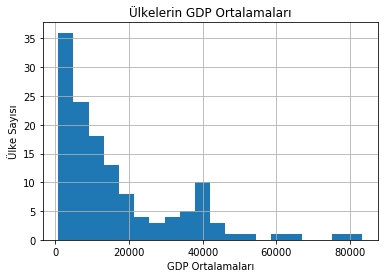

In [5]:
DF_M.hist(column='GDP ortalama', bins=20)
plt.title('Ülkelerin GDP Ortalamaları')
plt.xlabel('GDP Ortalamaları')
plt.ylabel('Ülke Sayısı')
plt.show()

GDP ortalaması en yüksek ilk 10 ülkeyi gösteren bir sütun (bar) grafik çizin.

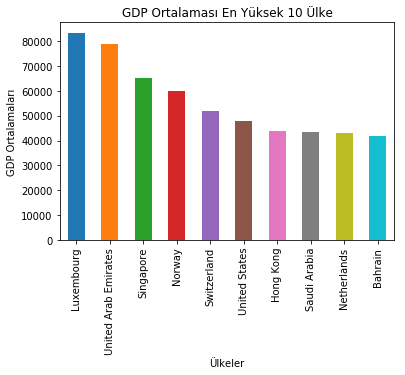

In [6]:
DF_M['GDP ortalama'].nlargest(n=10).plot(kind="bar", title='GDP Ortalaması En Yüksek 10 Ülke')
plt.xlabel('Ülkeler')
plt.ylabel('GDP Ortalamaları')
plt.show()

Her ülkenin kişi başına düşen yüzey alanını hesaplayınız ve kişi başına düşen yüzey alanı en küçük olan ilk 20 ülkeyi gösteren bir sütun grafik çizin.

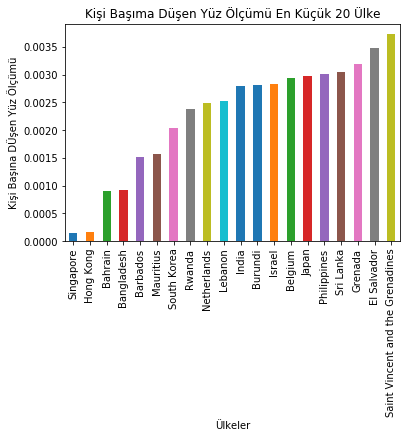

In [7]:
(DF_M['Area(in sq km)']/DF_M['Population']).nsmallest(n=20).plot(kind="bar", title='Kişi Başıma Düşen Yüz Ölçümü En Küçük 20 Ülke')
plt.xlabel('Ülkeler')
plt.ylabel('Kişi Başına DÜşen Yüz Ölçümü')
plt.show()

Kıtalara göre 'GDP ortalama' değerlerini gösteren bir sütun grafik çizin.

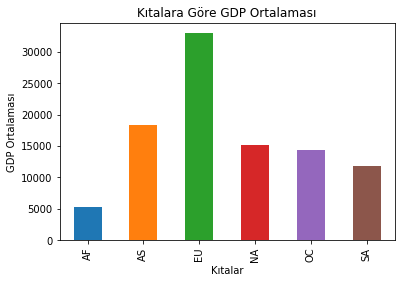

In [8]:
DF_M.groupby('Continent')['GDP ortalama'].mean().plot(kind='bar', title='Kıtalara Göre GDP Ortalaması')
plt.xlabel('Kıtalar')
plt.ylabel('GDP Ortalaması')
plt.show()

Kıtalara göre toplam nüfus ve toplam alan dağılımlarını gösteren pasta (pie) grafikleri içeren bir şekil (figure) çizin. 

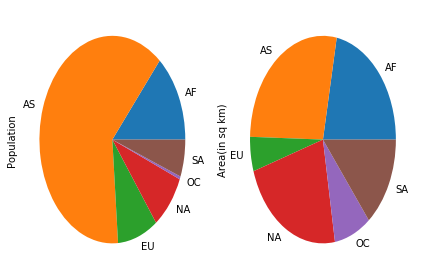

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2)
DF_M.groupby('Continent')['Population'].sum().plot(kind='pie', ax= ax1)
DF_M.groupby('Continent')['Area(in sq km)'].sum().plot(kind = 'pie', ax=ax2)

fig.tight_layout()

plt.show()

Veri setinden Türkiye'nin komşularını bulun, bu ülkelerin ve Türkiye'nin GDP ortalamalarını gösteren bir sütun grafik çizin.

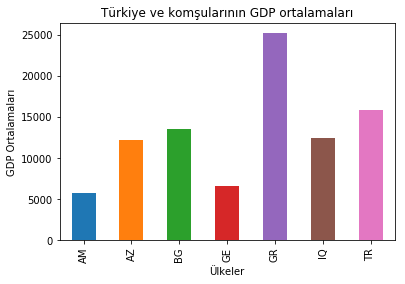

In [10]:
GDPT = {'TR': DF_M.loc['Turkey']['GDP ortalama']}
DF_M[DF_M['CountryCode'] == 'TR']['GDP ortalama'].item()

TK = DF_M.loc['Turkey']['neighbours'].split(',')
for neighbour in TK:
    if DF_M['CountryCode'].str.contains(neighbour).any():
        GDPT[neighbour] = DF_M[DF_M['CountryCode'] == neighbour]['GDP ortalama'].item()

gdpt = pd.Series(GDPT)
gdpt.plot(kind='bar')
plt.xlabel('Ülkeler')
plt.ylabel('GDP Ortalamaları')
plt.title('Türkiye ve komşularının GDP ortalamaları')

plt.show()

Her ülke için o ülkenin komşu ülkelerinin ortalama GDP değerlerinin ortalamasını hesaplayarak yeni bir seri oluşturunuz (eğer bir ülkenin komuşusu yoksa kendi GDP ortalamasını alınız) ve komşuları ile en fazla ortalama GDP farkı olan ilk 20 ülkeyi listeleyin.

In [11]:
MGDPON = pd.Series()
GDPD = pd.Series()

for index in DF_M.index:
    has_actual_neighbours = False
    mgdp = 0
    counter = 0
    if pd.notnull(DF_M.loc[index]['neighbours']) :
        temp_neighbours = DF_M.loc[index]['neighbours'].split(',')
        for neighbour in temp_neighbours:
            counter += 1
            if DF_M['CountryCode'].str.contains(neighbour).any():
                mgdp += DF_M[DF_M['CountryCode'] == neighbour]['GDP ortalama'].item()
                has_actual_neighbours = True
                
        if has_actual_neighbours:    
            MGDPON[index] = mgdp/counter
            GDPD[index] = abs(DF_M.loc[index]['GDP ortalama'] - mgdp/counter)
        
        else:
            MGDPON[index] = DF_M.loc[index]['GDP ortalama'], 
            GDPD[index] = 0
                
    else:
        MGDPON[index] = DF_M.loc[index]['GDP ortalama'], 
        GDPD[index] = 0
    
GDPPC = pd.DataFrame()
GDPPC['GDP'] = MGDPON
GDPPC['Fark'] = GDPD
GDPPC.set_index(MGDPON.index)

#print(GDPPC.nlargest(n=20, columns='Fark').index.values)

GDPPC.nlargest(n=20, columns='Fark')

,GDP,Fark
Luxembourg,37797.9,45563.066667
United Arab Emirates,41800.5,37247.900000
Norway,25567.7,34190.533333
United States,18158.7,29549.233333
Austria,15746.4,24971.500000
Saudi Arabia,20140.4,23282.885714
Switzerland,30021.8,21988.260000
Israel,6274.66,21794.740000
Spain,13354.7,17315.900000
Equatorial Guinea,10366.2,15357.250000


Ülkelerin yüzey ölçümü ile nüfusları arasındaki ilişkiyi gösteren bir dağılım (scatter) grafiği çizin. Baloncuklara ülke isimlerini ekleyin.

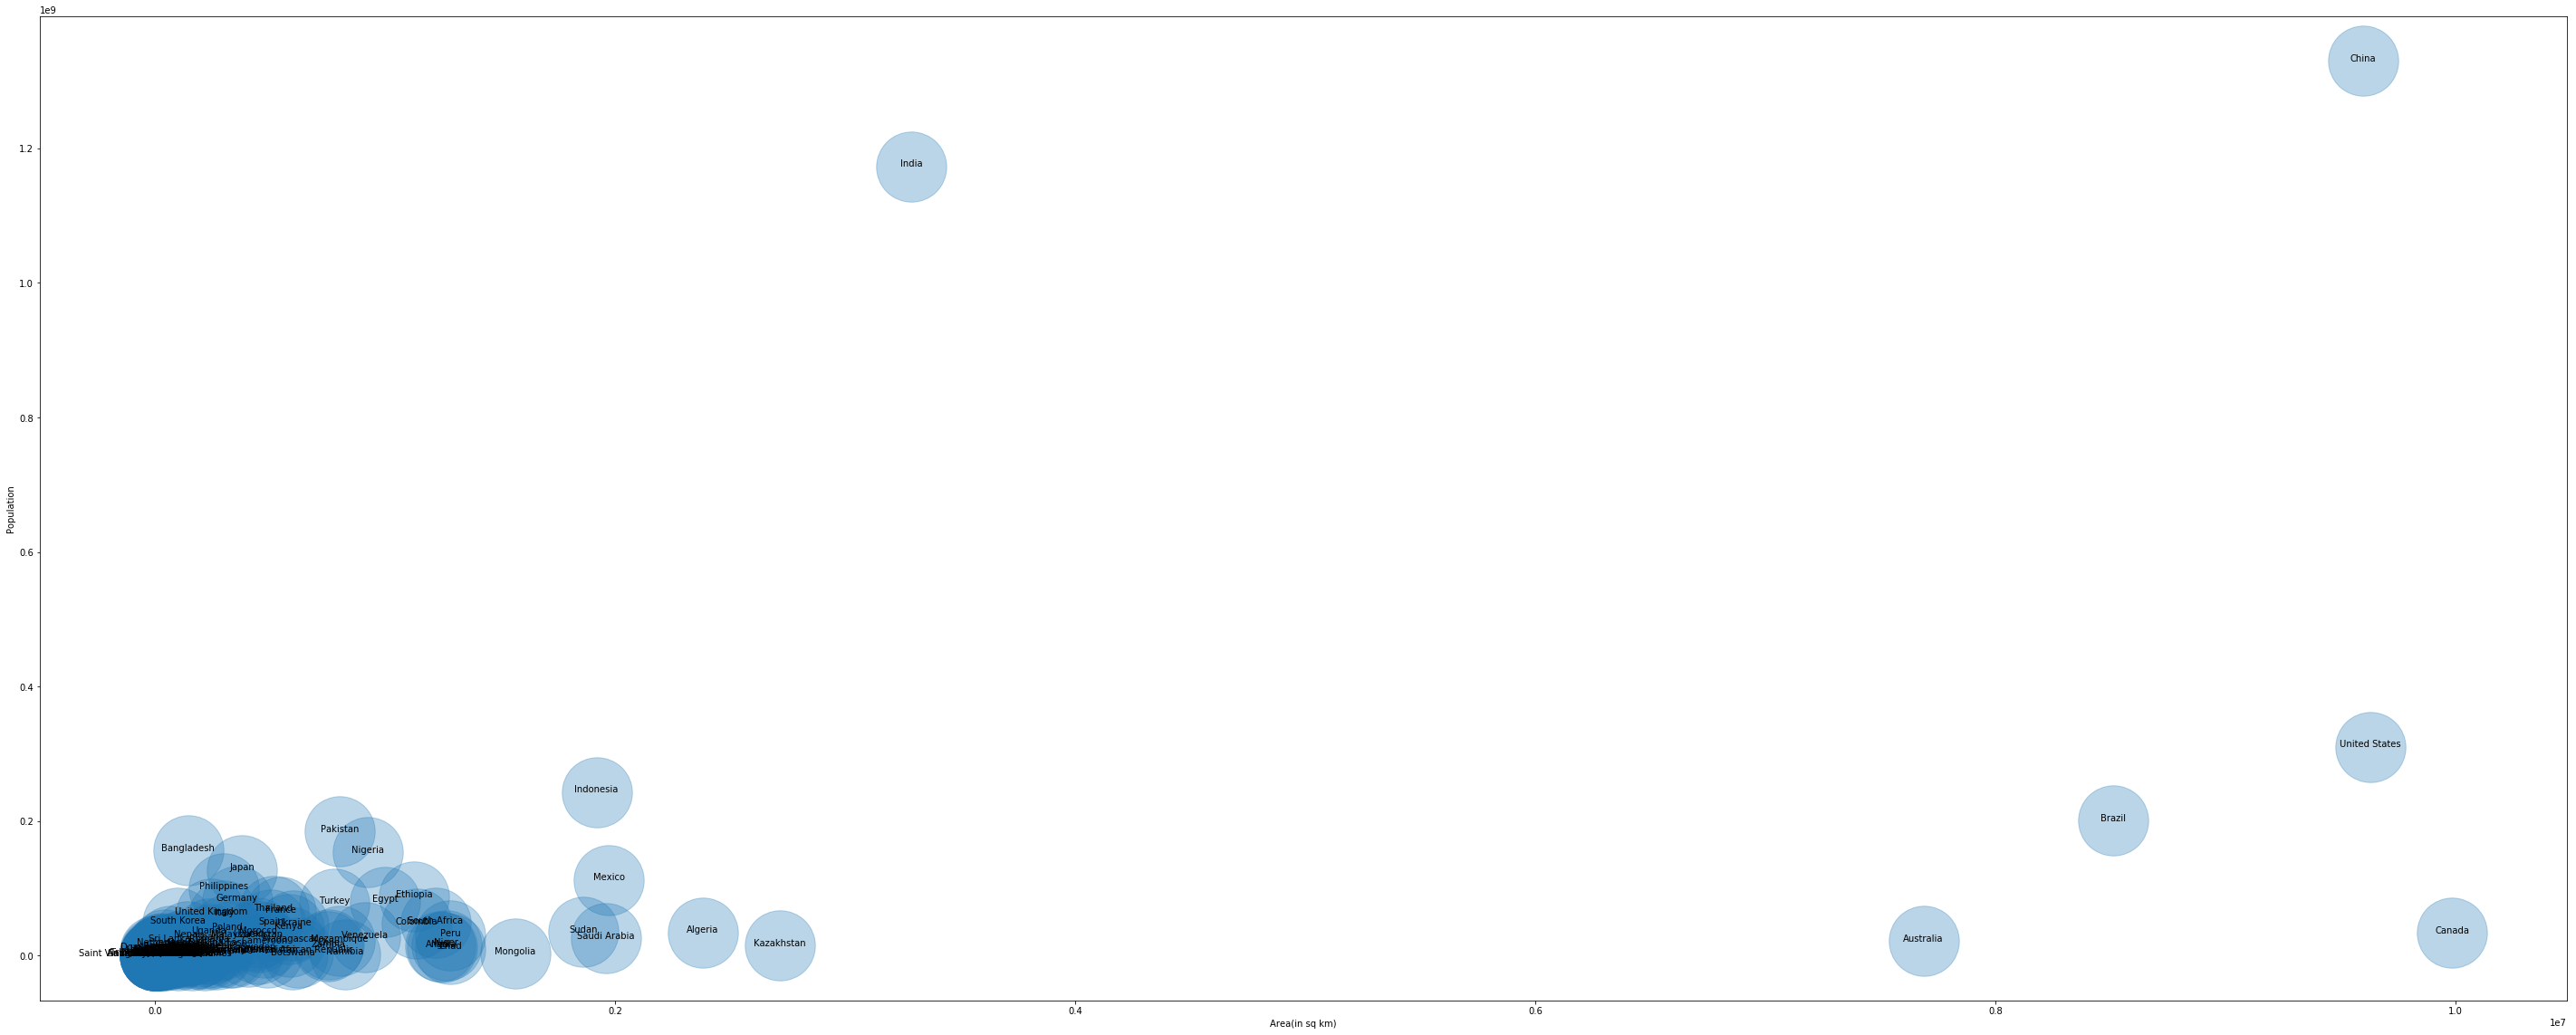

In [12]:
%matplotlib inline
ax = DF_M.plot(x='Area(in sq km)', y='Population', kind='scatter', alpha=0.3, figsize=(50,20), s=6000)
for i, txt in enumerate(DF_M.index):
    ax.annotate(txt, (DF_M['Area(in sq km)'].iat[i],DF_M['Population'].iat[i]), ha='center')

İnsani gelişmişlik indeksi en yüksek 20 ülkenin, insani gelişmişlik indeksi ile ortalama GDP değerleri arasındaki ilişkiyi gösteren bir dağılım (scatter) grafiği çizin. Baloncukların büyüklüklerini, ortalama GDP değeriyle orantılayın. Baloncuklara ülke isimlerini ekleyin. Baloncukları kıtalara göre renklendirin.

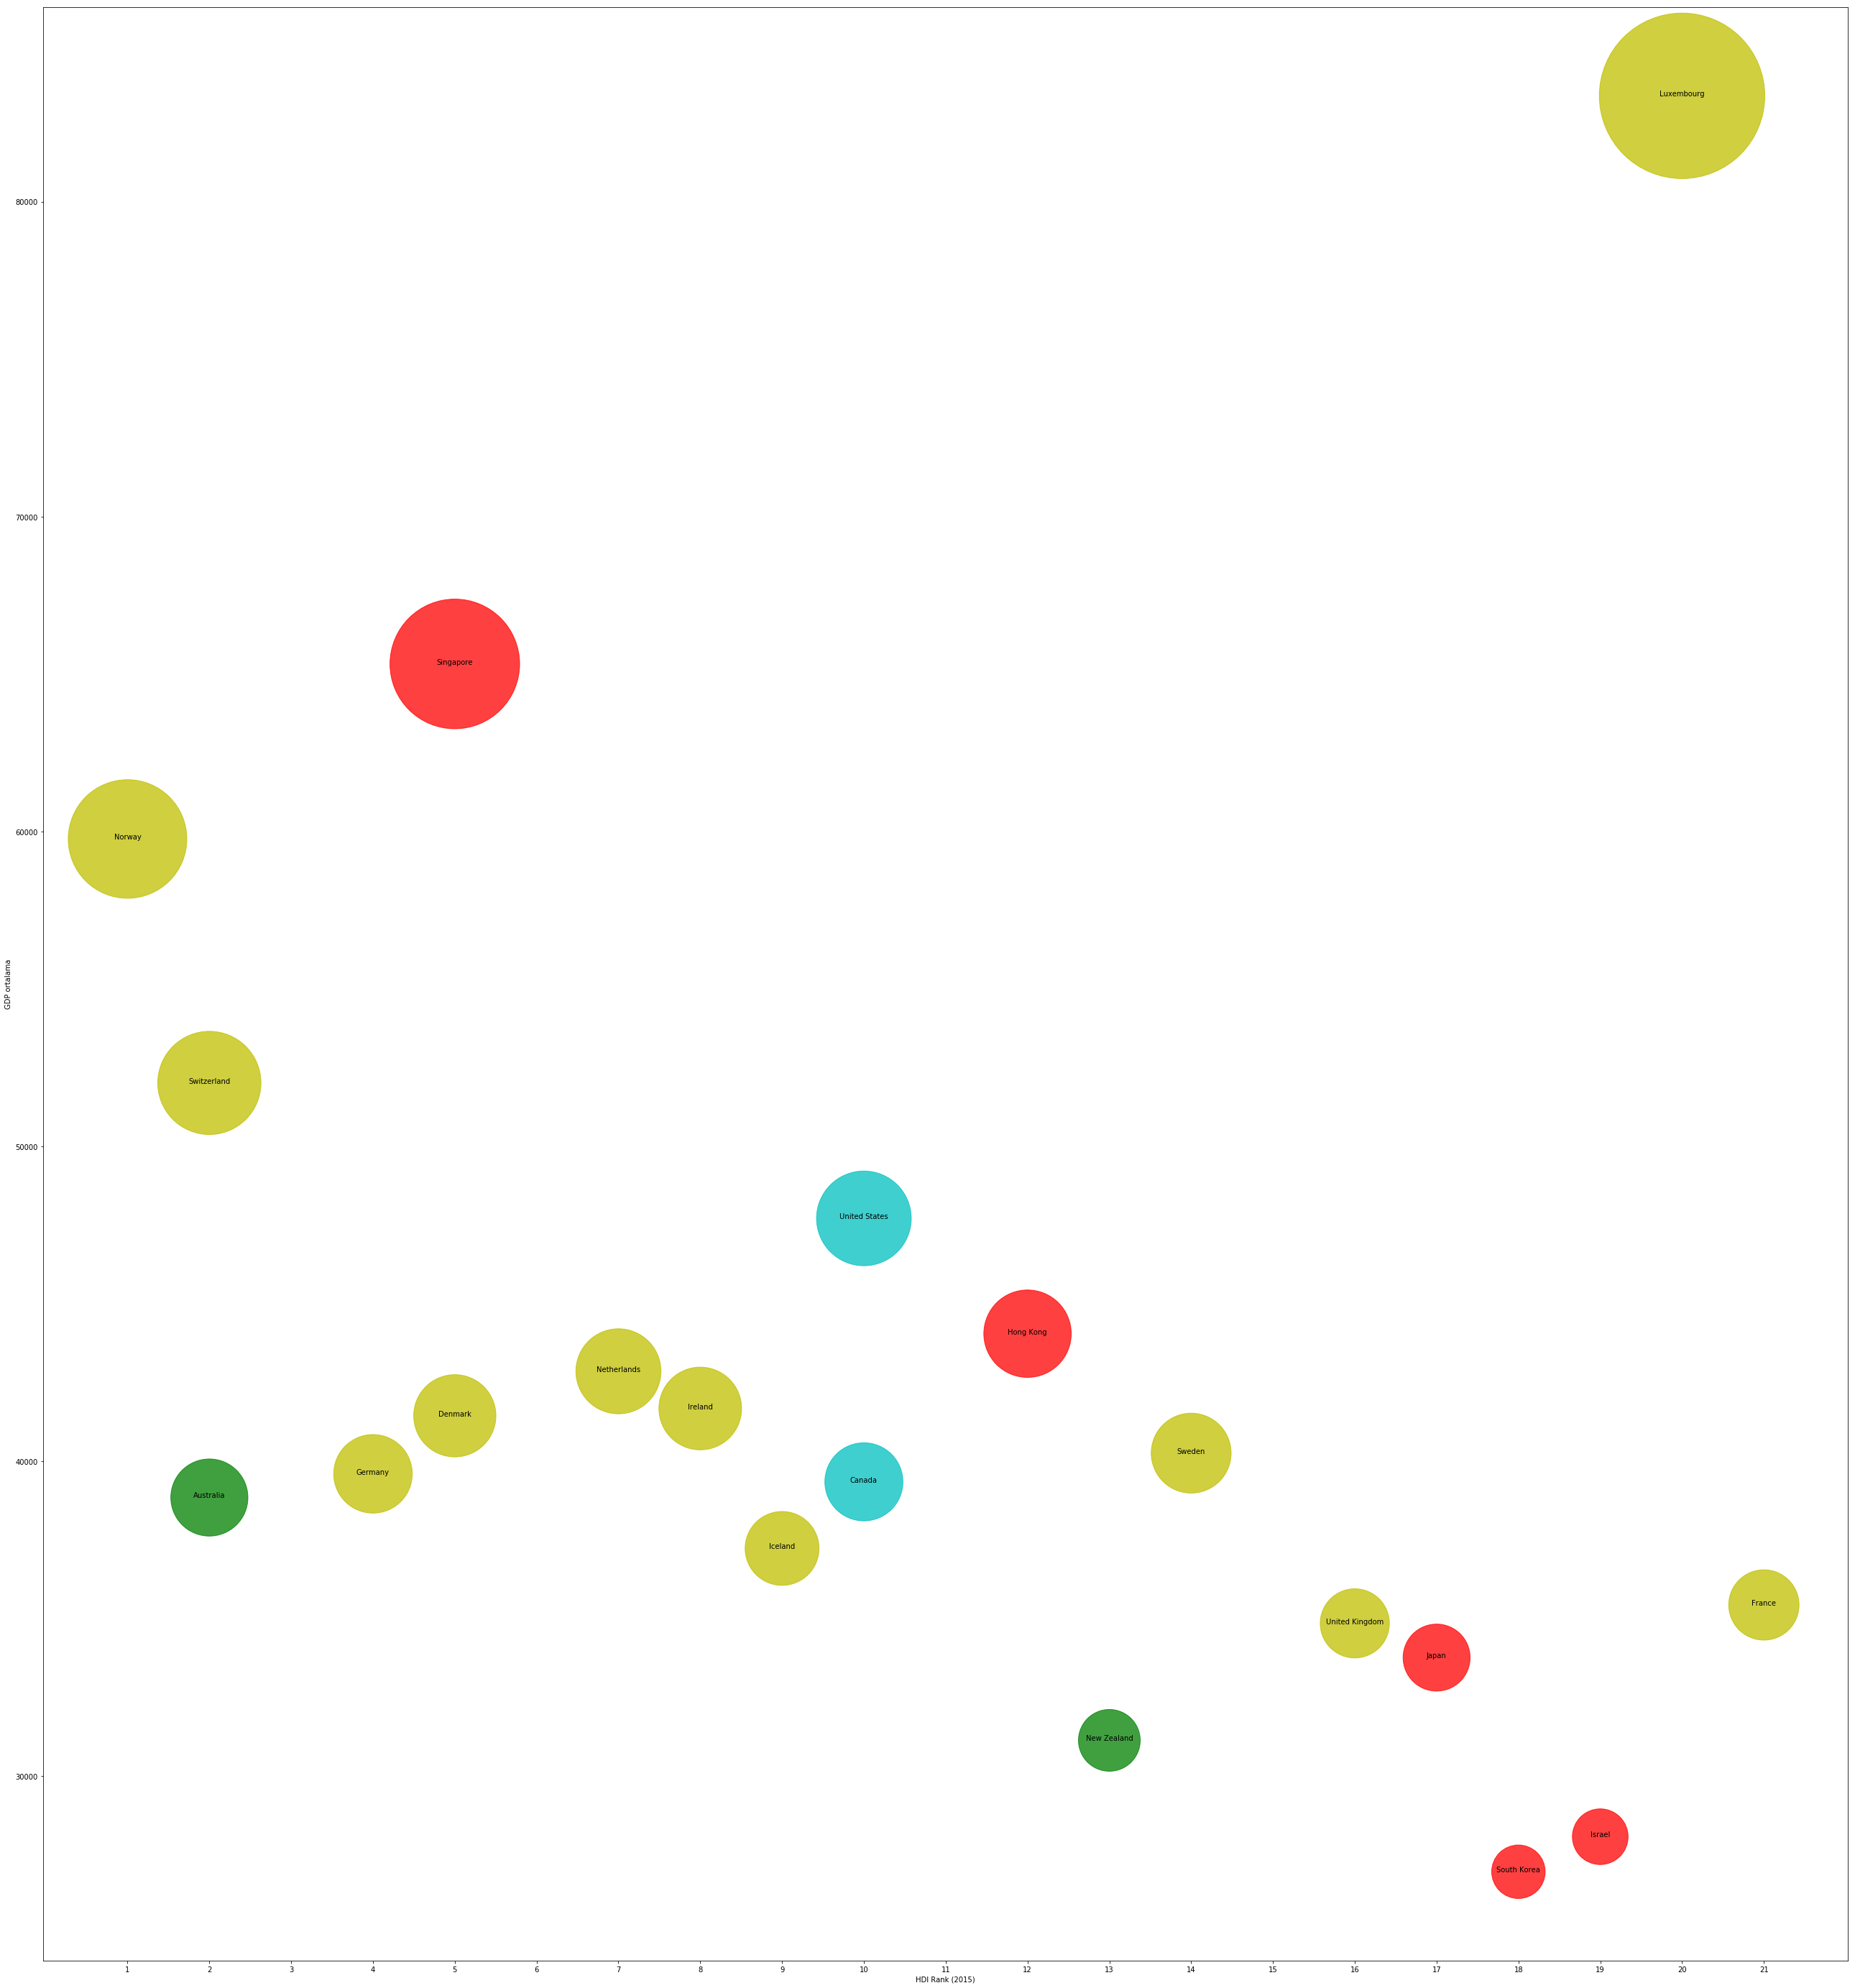

In [13]:
import numpy as np

DF_HDI = DF_M.sort_values(by='HDI Rank (2015)')[['HDI Rank (2015)','GDP ortalama', 'Continent']].head(20)
colors = np.where(DF_HDI.Continent=='AS','r', 'b')
colors = np.where(DF_HDI.Continent=='OC','g',colors)
colors = np.where(DF_HDI.Continent=='EU','y',colors)
colors = np.where(DF_HDI.Continent=='NA','c',colors)

DF_HDI = DF_HDI[['HDI Rank (2015)','GDP ortalama']]

%matplotlib inline
ax = DF_HDI.plot(kind='scatter', x='HDI Rank (2015)', y='GDP ortalama', s=(DF_HDI['GDP ortalama']**2)/(2**17), figsize=(45,50), c=colors,alpha=.75, xticks=range(1,22))
for i, txt in enumerate(DF_HDI.index):
    ax.annotate(txt, [DF_HDI['HDI Rank (2015)'][i], DF_HDI['GDP ortalama'][i]], ha='center')
    
plt.show()

1990 yılı ile 2015 yılı arasındaki GDP değeri değişimi en yüksek olan 15 ülkenin (1) 1990 ve 2015 GDP değerlerini, (2) fark  değerlerini gösteren sütun grafiklerini içeren bir şekil (figure) çizin.

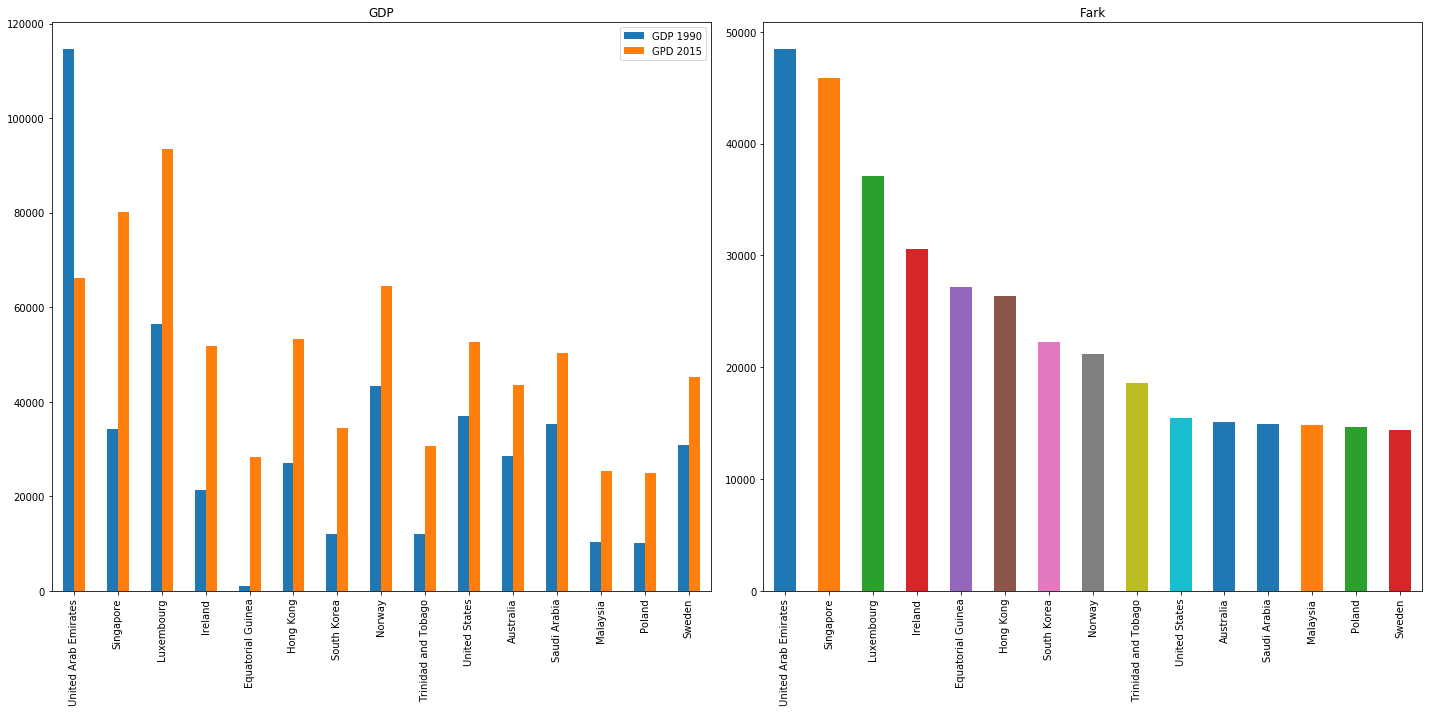

In [14]:
GDP2015 = pd.Series()
GDP1990 = pd.Series()
Fark = pd.Series()

countries = abs(DF_M['2015']-DF_M['1990']).nlargest(n=15).index
for country in countries:
    GDP2015[country] = DF_M.loc[country]['2015']
    GDP1990[country] = DF_M.loc[country]['1990']

GDP = pd.DataFrame()
GDP['GDP 1990'] = GDP1990
GDP['GPD 2015'] = GDP2015
GDP['Fark'] = abs(DF_M['2015'] - DF_M['1990'])
GDP.set_index(GDP1990.index)

fig, (ax1, ax2) = plt.subplots(1, 2)

GDP[['GDP 1990','GPD 2015']].plot(kind="bar", ax=ax1, title='GDP')
GDP['Fark'].plot(kind='bar',ax=ax2, title='Fark', figsize=(20,10))

fig.tight_layout()

plt.show()

Güney Amerika ('SA') ülkelerinin 1990'dan 2015'e kadar olan GDP değişimlerini yıllara göre gösteren bir çizgi (line) grafik çizin.  

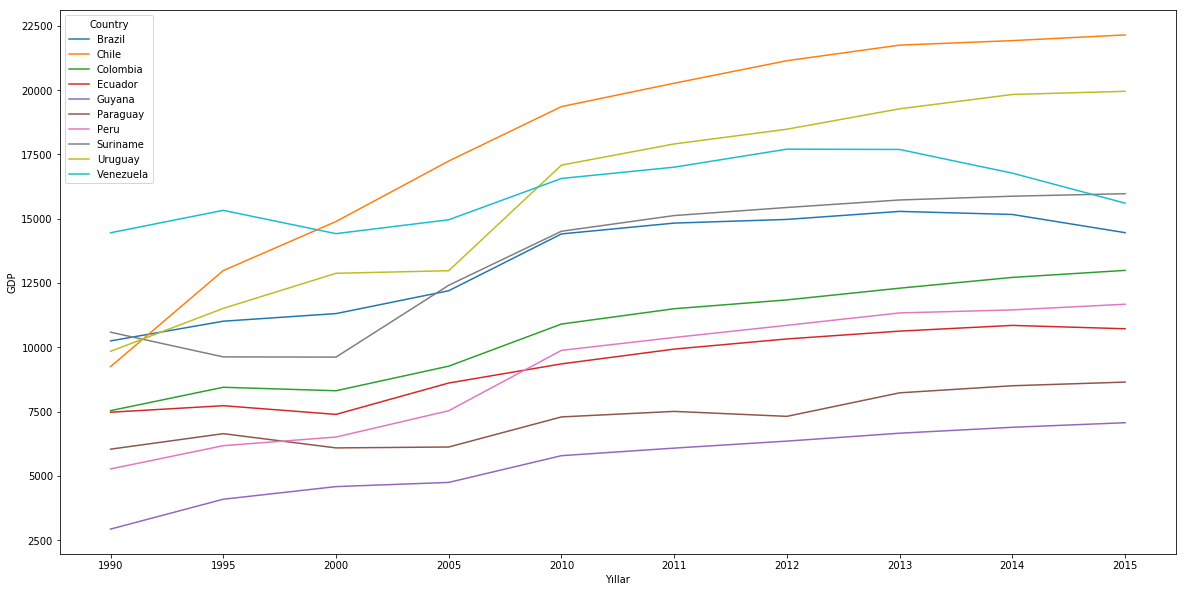

In [15]:
DF_M[DF_M['Continent'] == 'SA'].iloc[:,1:11].transpose().plot(kind='line', xticks=range(0,10),  figsize=(20,10))
plt.xlabel('Yıllar')
plt.ylabel('GDP')

plt.show()

Dünya'da en çok sayıda ülkede konuşulan ilk 10 dili (bir dilin ülkelere göre yerelleşmiş türlerini, aynı dil olarak kabul edin) ve konuşuldukları ülke sayılarını gösteren bir sütun grafik çizin.

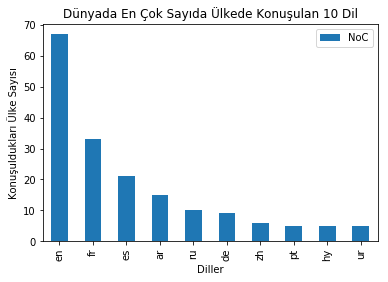

In [16]:
from collections import defaultdict
lang = defaultdict(int)

for country in DF_M.index:
        languages = DF_M.loc[country]['Languages'].replace('-'+DF_M.loc[country]['CountryCode'], '').split(',')
        for language in languages:
            lang[language] = lang[language]+1
            
df_lang = pd.DataFrame(index=lang.keys())
df_lang['NoC'] = lang.values() 
df_lang.nlargest(n=10, columns='NoC').plot(kind='bar', title='Dünyada En Çok Sayıda Ülkede Konuşulan 10 Dil')
plt.xlabel('Diller')
plt.ylabel('Konuşuldukları Ülke Sayısı')
plt.show()